**신경망 모델 훈련**

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model_fn() 함수에 keras 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가한다.

In [4]:
model=model_fn()
model.summary()

c:\anaconda\envs\weit_python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=5, verbose=0)
# verbose: 훈련 과정 출력을 조절함 (진행 막대, 손실 등의 지표 출력 여부), 0은 훈련 과정을 나타내지 않음

In [6]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


history: keras가 epoch마다 손실과 정확도를 계산해서 나열한 리스트

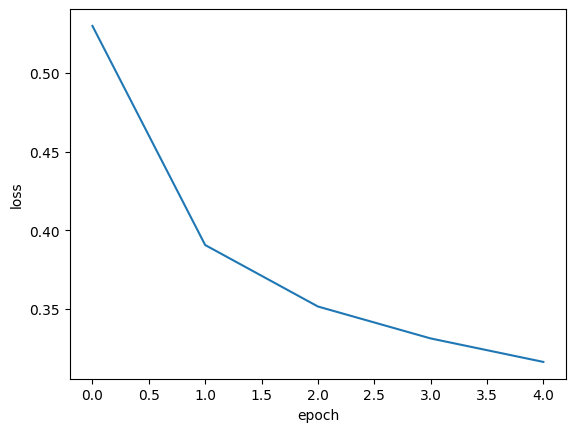

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

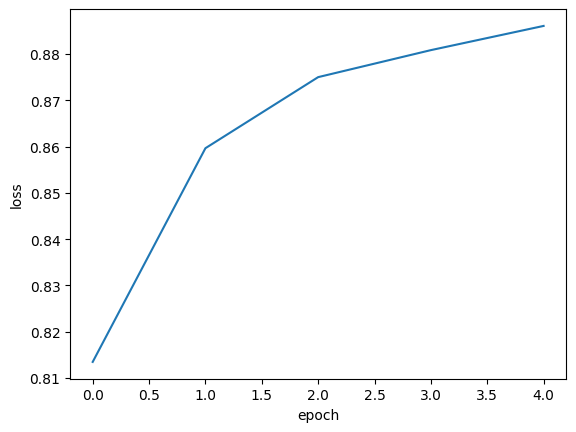

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

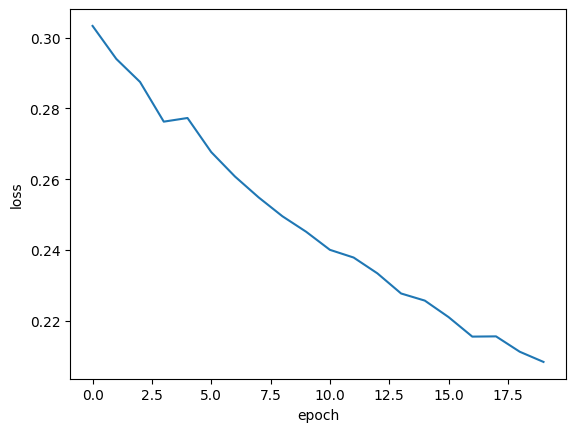

In [9]:
import matplotlib.pyplot as plt
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**검증 손실**

In [10]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data = (val_scaled, val_target))

c:\anaconda\envs\weit_python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


val_loss: 검증 세트에 대한 손실

val_accuray: 검증 세트에 대한 정확도

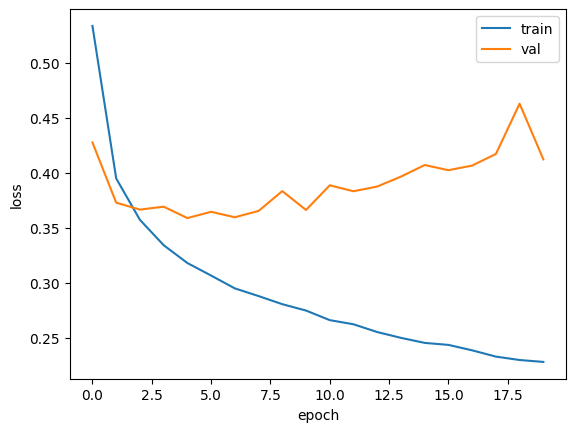

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

7.5 epoch에서 상승하기 시작한다.

train loss는 계속 감소하기 때문에 과대적합 모델이 만들어진다. 검증 손실이 상승하는 시점을 가능한 늦춰서 검증 세트에 대한 손실을 줄이고 정확도를 증가시킨다.

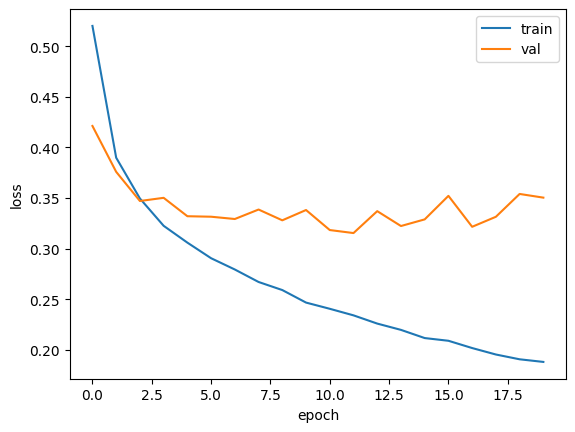

In [13]:
# SGD 대신 Adam을 옵티마이저로 선택한다.
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합이 줄어든 걸 볼 수 있다.

12.5번째 epoch까지 전반적으로 감소하는 추세를 보인다.

**dropout**

: 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로 만들어) 과대적합을 맏는다.

과대 적합 방지) 이전 층의 일부 뉴런을 랜덤하게 꺼서 특정 뉴런에 과대하게 의존하는 것을 줄이고 모든 입력에 주의를 기울인다. 마치 여러 신경망을 앙상블하는 것처럼 보인다. 

In [14]:
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도를 dropout
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

훈련이 끝난 뒤에 평가/예측을 할 때는 dropout을 적용하지 말아야 한다. keras와 tensorflow가 자동으로 dropout을 적용해준다.

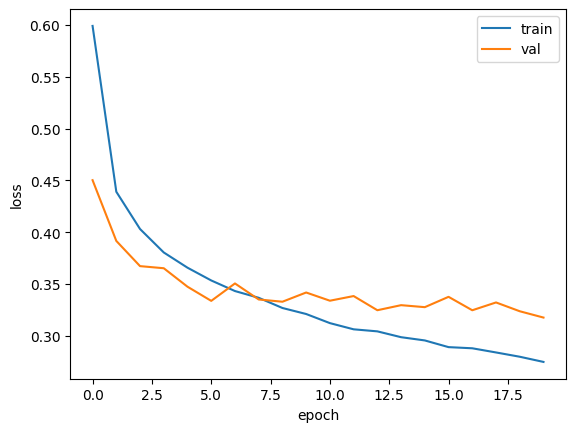

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합이 확실히 줄었다.

12.5 번째 에포크에서 검증 손실의 감소가 멈추지만 상승하지 않고 유지하고 있다.

**모델 저장과 복원**

In [16]:
#epoch을 20->10으로 수정
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도를 dropout
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=10, verbose=0,
                  validation_data = (val_scaled, val_target))

H5 파일: HDF5 (Hierarchical Data Format version 5) 포맷으로 저장된 파일이다. HDF5는 대규모 데이터를 효율적으로 저장하고 관리하기 위해 설계된 파일 형식이다.

Keras는 모델의 구조, 가중치, 옵티마이저 상태 등을 H5 파일로 저장할 수 있다.

In [17]:
# save_weights() 메소드; 훈련된 모델의 parameter를 저장함
model.save_weights('model-weights.weights.h5')

In [18]:
import h5py

with h5py.File('model-weights.weights.h5', 'r') as f:
    print(list(f.keys()))  # 파일 내의 그룹 및 데이터셋 확인

['layers', 'optimizer', 'vars']


In [19]:
model.save('model-whole.h5') #모델 구조 + 가중치 + 옵티마이저 상태

In [20]:
import h5py

with h5py.File('model.h5', 'r') as f:
    print(list(f.keys()))  # 파일 내의 그룹 및 데이터셋 확인

['model_weights', 'optimizer_weights']


**1. 훈련을 하지 않은 모델을 생성 -> model-weights-weights.h5 파일에서 훈련된 모델의 parameter을 읽어서 사용하기**

In [21]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.weights.h5')

검증 정확도 확인) keras의 predict() 메서드는 사이킷런과 달리 sample마다 10개의 class에 대한 확률을 반환한다. (패션 데이터가 다중 분류문제이기 때문)

패션 데이터 셋에서 덜어낸 valid-set은 12,000개이므로 predict는 12,000*10 배열을 반환한다.

In [22]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) # 10개의 확률 중 가장 큰 값의 인덱스 고르기, axis=-1은 배열의 마지막 차원을 따라 최댓값을 고르기
print(np.mean(val_labels==val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.8793333333333333


<img src="axis.jpg" alt="description" width="300"/>

**2. model-whole.h5에서 새로운 모델을 만들어 사용**

In [23]:
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8829 - loss: 0.3326


[0.33340734243392944, 0.8793333172798157]

**콜백**

: 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체임

fit()는 callbacks 매개변수에 list로 전달하여 사용한다.

ModelCheckpoint 콜백은 epoch마다 모델을 저장한다. save_best_only=True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델을 저장한다.

In [24]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only = True) #best-model.keras로 파일 이름 지정하여 콜백 적용

model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

In [25]:
model=keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8876 - loss: 0.3132


[0.31636562943458557, 0.8861666917800903]

ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장함

조기 종료: validation score이 상승(과대 적합)하기 전에 훈련을 끝내는 것

-> keras에서 EarlyStopping 콜백을 제공한다 ; 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지한다. 훈련을 중지하고 현재 모델의 parameter를 최상의 parameter로 되돌린다.

patience=2 : 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
restore_best_weights = True: 가장 낮은 검증 손실을 낼 모델 parameter로 되돌림

In [31]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only = True) #best-model.keras로 파일 이름 지정하여 콜백 적용
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data = (val_scaled, val_target),
                  callbacks=[checkpoint_cb, early_stopping_cb]) # 콜백을 리스트로 전달

In [32]:
print(early_stopping_cb.stopped_epoch) #13번째 epoch에서 훈련이 중지 됨 (0부터 시작)

11


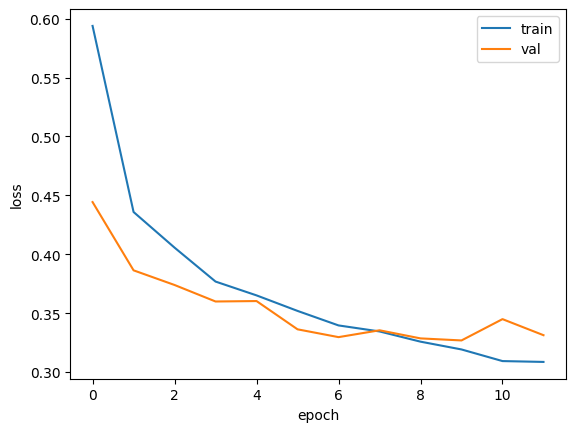

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [29]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.8908 - loss: 0.3129


[0.3119599521160126, 0.8913333415985107]